In [1]:
!pip install fbprophet

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gs.us (2).txt to gs.us (2).txt


In [3]:
import pandas as pd
df = pd.read_csv("gs.us (2).txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1,1999-05-05,62.213,62.213,58.991,61.547,8295140,0
2,1999-05-06,60.542,61.773,59.712,60.488,3185852,0
3,1999-05-07,60.488,66.671,59.429,65.998,5331091,0
4,1999-05-10,65.331,65.441,62.549,62.941,2839054,0


In [4]:
df = df.drop(columns=['High','Low','Close','Volume','OpenInt'])
df.head()

,Date,Open
0,1999-05-04,67.665
1,1999-05-05,62.213
2,1999-05-06,60.542
3,1999-05-07,60.488
4,1999-05-10,65.331


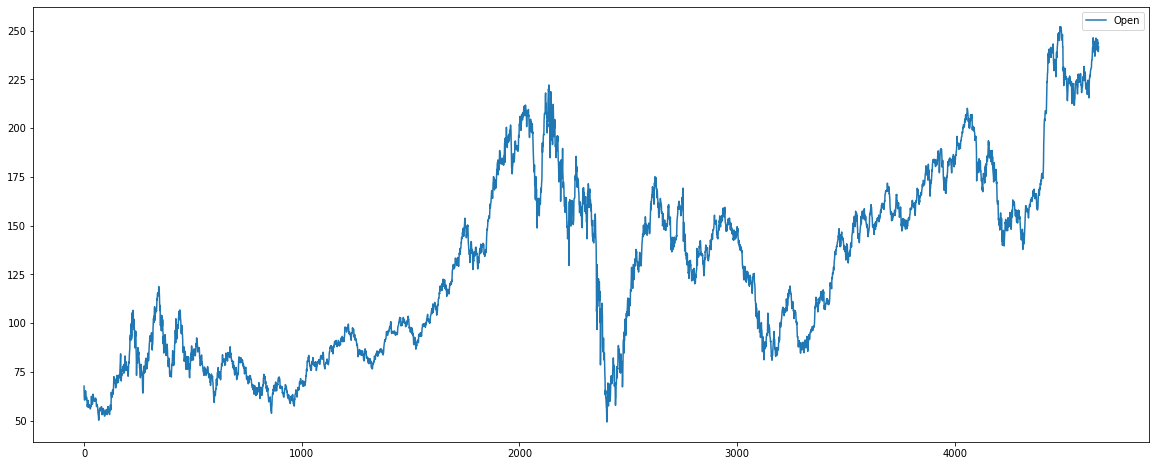

In [5]:
from matplotlib import pyplot
df[['Date','Open']].plot(figsize=(20, 8))
pyplot.show()

In [ ]:
#from matplotlib import pyplot
#df[['Date','High']].plot(figsize=(20, 8))
#pyplot.show()

In [ ]:
#from matplotlib import pyplot
#df[['Date','High']].plot(figsize=(20, 8))
#pyplot.show()

In [6]:
from pandas import to_datetime
df.columns = ['ds','y']
df['ds']= to_datetime(df['ds'])
df.head()

,ds,y
0,1999-05-04,67.665
1,1999-05-05,62.213
2,1999-05-06,60.542
3,1999-05-07,60.488
4,1999-05-10,65.331


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4661 non-null   datetime64[ns]
 1   y       4661 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 73.0 KB


In [8]:
from fbprophet import Prophet
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future_dates = model.make_future_dataframe(periods=365)
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1999-05-04,57.116915,38.176991,76.669187,57.116915,57.116915,0.078633,0.078633,0.078633,-1.910049,-1.910049,-1.910049,1.988682,1.988682,1.988682,0.0,0.0,0.0,57.195548
1,1999-05-05,57.196033,38.305917,76.955908,57.196033,57.196033,-0.033030,-0.033030,-0.033030,-1.893819,-1.893819,-1.893819,1.860789,1.860789,1.860789,0.0,0.0,0.0,57.163003
2,1999-05-06,57.275151,38.212766,77.122889,57.275151,57.275151,0.014684,0.014684,0.014684,-1.697000,-1.697000,-1.697000,1.711684,1.711684,1.711684,0.0,0.0,0.0,57.289835
3,1999-05-07,57.354269,37.292337,78.241455,57.354269,57.354269,-0.227268,-0.227268,-0.227268,-1.770336,-1.770336,-1.770336,1.543068,1.543068,1.543068,0.0,0.0,0.0,57.127001
4,1999-05-10,57.591623,37.318818,77.634729,57.591623,57.591623,-0.867849,-0.867849,-0.867849,-1.811629,-1.811629,-1.811629,0.943780,0.943780,0.943780,0.0,0.0,0.0,56.723774


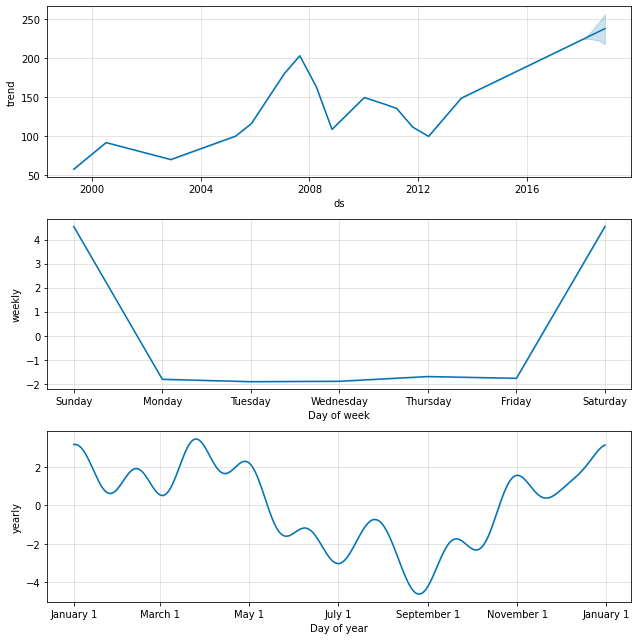

In [10]:
model.plot_components(prediction);

In [12]:
!pip install prophet

     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 178 kB 34.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641061 sha256=95ad43ebdddff03938913e0f37d38673c3fd44466f620fddb90276829a629039
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


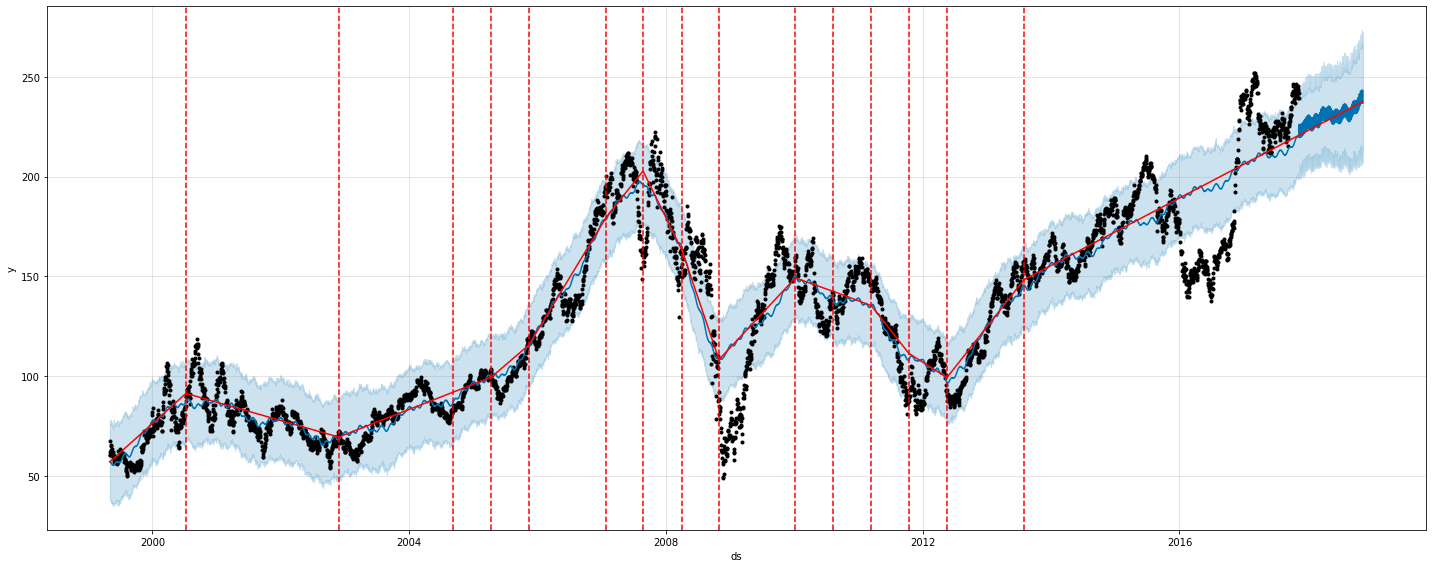

In [13]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(prediction,figsize=(20, 8));
a = add_changepoints_to_plot(fig.gca(), model, prediction)

In [14]:
from fbprophet.diagnostics import cross_validation
cv = cross_validation(model, initial='3285 days', period = '180 days', horizon = '365 days')
cv.head()

INFO:fbprophet:Making 18 forecasts with cutoffs between 2008-06-25 00:00:00 and 2016-11-10 00:00:00


  0%|          | 0/18 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-06-26,181.869881,167.549226,197.155014,163.27,2008-06-25
1,2008-06-27,182.151659,167.121423,196.159971,161.44,2008-06-25
2,2008-06-30,182.450685,167.284763,196.669504,160.12,2008-06-25
3,2008-07-01,182.583581,167.923061,196.968714,157.19,2008-06-25
4,2008-07-02,182.592002,169.033095,196.207921,161.25,2008-06-25


In [15]:
from fbprophet.diagnostics import performance_metrics
p = performance_metrics(cv)
p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
323,361 days,3635.006264,60.291013,53.473547,0.381404,0.378599,0.271386
324,362 days,3633.398132,60.277675,53.381658,0.381731,0.373114,0.273656
325,363 days,3627.831400,60.231482,53.210224,0.380564,0.376139,0.275442
326,364 days,3618.487104,60.153862,53.086301,0.379841,0.378599,0.276917
327,365 days,3623.640586,60.196683,53.107981,0.380052,0.378599,0.275357


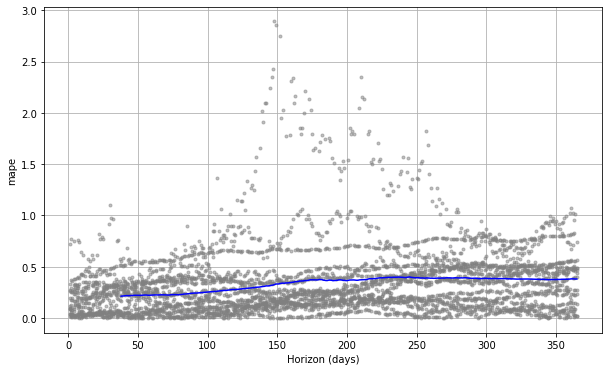

In [16]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv, metric = 'mape')